<a href="https://colab.research.google.com/github/EmmanuelSalako/Decling-Ltd/blob/main/Amazon_Customer_Behavior_Analysis_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amazon Customer Behavior Analysis for Gender Prediction**

## **1. Aims and Objectives**


* **Understanding Customer Behavior Dataset:** This dataset offers a comprehensive look at how customers interact with Amazon. It includes details on demographics, browsing habits within the platform, and even customer reviews.

* **Unlocking Customer Insights:** By analyzing this data, we can gain valuable insights into customer preferences, shopping habits, and how they make decisions on Amazon. This knowledge can be used to improve marketing strategies and enhance the overall customer experience.

* **Exploring Customer Behavior:** This analysis aims to delve deeper into customer behavior on Amazon and uncover the relationships between various aspects captured in the dataset.

* **Predicting Customer Gender:** The ultimate goal is to develop a machine learning model that can accurately predict a customer's gender based solely on their browsing behavior and interaction patterns on the platform.

## **2. Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import scipy
from scipy.stats import spearmanr
import statistics
from datetime import timedelta

import warnings
warnings.simplefilter("ignore")


## **3. Data Description**

In [ ]:
data = pd.read_csv("Amazon Customer Behavior Survey.csv")
print("Data Shape >>",data.shape)
data.head(5)

Data Shape >> (602, 23)


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [ ]:
print("The data size -->",data.shape)

The data size --> (602, 23)


In [ ]:
print("Feature of the data ---> \n\n" ,tuple(data.columns))

Feature of the data ---> 

 ('Timestamp', 'age', 'Gender', 'Purchase_Frequency', 'Purchase_Categories', 'Personalized_Recommendation_Frequency', 'Browsing_Frequency', 'Product_Search_Method', 'Search_Result_Exploration', 'Customer_Reviews_Importance', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability', 'Review_Helpfulness', 'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness', 'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas')


In [ ]:
data.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [ ]:
data.isna().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [ ]:
data.duplicated().sum()

0

## **4. Data Cleaning and Feature Engineering**

**Renaming the first "Personalized_Recommendation_Frequency" column to "Recomendation Purchase Status"**

In [ ]:
data.rename(columns= {"Personalized_Recommendation_Frequency" : "Recomendation_Purchase_Status"} , inplace= True)

**Replacing the null values in the 'Product_Search_Method' column with the mode value found within the same column.**

In [ ]:
data.loc[data['Product_Search_Method'].isnull() , "Product_Search_Method"] = data['Product_Search_Method'].mode().tolist()[-1]

**Creating Date and Time columns by extracting data from Timestamp column**

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Timestamp'] += timedelta(hours=5, minutes=30)
data['Date'] = data['Timestamp'].dt.strftime('%d/%m/%Y')
data['Time'] = data['Timestamp'].dt.time


**Creating an Age Category Column**

In [ ]:
def age_cat(row):
    x = row['age']
    if x < 18 :
        return 'Minor (<18)'
    elif (x > 18) & (x <= 25):
        return 'Young Adult (18-25)'
    elif (x > 25) & (x <= 40):
        return "Adult (26-40)"
    elif (x > 40) & (x <= 60) :
        return 'Middle-Aged Adult (41-60)'
    else :
        return 'Senior Citizen (>60)'
data['Age_Category'] = data.apply(age_cat , axis = 1)


**Creating a Time Status Column**

In [ ]:

def Time_cat(x):
    if 6 <= x.hour < 12:
        return 'Morning'
    elif 12 <= x.hour < 18:
        return 'Afternoon'
    elif 18 <= x.hour < 21:
        return 'Evening'
    else:
        return 'Night'

data['Time_Status'] = data['Time'].apply(Time_cat)


**Re-arranging columns and removing unnecessary columns of the data**

In [ ]:
data.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Recomendation_Purchase_Status',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'Date', 'Time', 'Age_Category', 'Time_Status'],
      dtype='object')

In [ ]:
order = ['Date','Time','Time_Status','age','Age_Category','Gender','Purchase_Categories','Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration','Customer_Reviews_Importance','Add_to_Cart_Browsing', 'Cart_Completion_Frequency','Cart_Abandonment_Factors',
       'Saveforlater_Frequency', 'Review_Left','Review_Reliability', 'Review_Helpfulness','Recomendation_Purchase_Status',
       'Personalized_Recommendation_Frequency ','Recommendation_Helpfulness','Rating_Accuracy ', 'Shopping_Satisfaction',
       'Service_Appreciation','Improvement_Areas','Purchase_Frequency']

data = data[order]


In [ ]:
print("The data size --->", data.shape)

The data size ---> (602, 26)


In [ ]:
data.sample(3)

,Date,Time,Time_Status,age,Age_Category,Gender,Purchase_Categories,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,...,Review_Reliability,Review_Helpfulness,Recomendation_Purchase_Status,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Purchase_Frequency
47,05/06/2023,12:46:40,Afternoon,24,Young Adult (18-25),Female,Clothing and Fashion,Few times a month,Filter,Multiple pages,...,Occasionally,Sometimes,Sometimes,3,Sometimes,3,3,Product recommendations,Product quality and accuracy,Less than once a month
52,05/06/2023,16:07:36,Afternoon,24,Young Adult (18-25),Female,Beauty and Personal Care;Clothing and Fashion,Few times a month,Keyword,Multiple pages,...,Heavily,Yes,No,1,Yes,2,2,User-friendly website/app interface,Shipping speed and reliability,Less than once a month
140,07/06/2023,00:12:00,Night,35,Adult (26-40),Female,Beauty and Personal Care,Few times a month,categories,First page,...,Occasionally,No,No,2,Sometimes,4,3,Product recommendations,Product quality and accuracy,Once a week


## **5. Exploratory Data Analysis**

### Gender Analysis

In [ ]:
Gender = data['Gender'].value_counts()

fig = px.pie(data_frame=Gender, names=Gender.index, values=Gender.values)
fig.update_layout(height = 450 , width = 1000 , showlegend = True, title = "Analyze the gender of the customers" ,title_font_size = 18 ,
                 title_x = 0.5)
fig.update_traces(textfont=dict(size=11))
fig.show()

The Customer Gender Distribution shows that females make up the majority of customers, accounting for around 58.5% of the entire user population. Males follow at 23.6%, with those who choose not to reveal their gender and others accounting for 14.8% and 3.16%, respectively.  


In [ ]:
Male = data.loc[data['Gender'] == 'Male',"Purchase_Categories"].value_counts()
Female = data.loc[data['Gender'] == 'Female', 'Purchase_Categories'].value_counts()
Others = data.loc[data['Gender'] == 'Others', 'Purchase_Categories'].value_counts()

In [ ]:
male_bar = go.Bar(x=Male.index, y=Male.values, name='Male', marker=dict(color='light blue', line=dict(color="black", width=1)))
female_bar = go.Bar(x=Female.index, y=Female.values, name='Female',marker=dict(color='pink', line=dict(color="black", width=1)))
others_bar = go.Bar(x=Others.index, y=Others, name='Others', marker=dict(color='light green', line=dict(color="black", width=1)))

In [ ]:
layout = go.Layout(title='Purchase Categories by Gender',
                   xaxis=dict(title='Purchase Categories'),
                   yaxis=dict(title='Count'),
                   barmode='group')

fig = go.Figure(data=[male_bar, female_bar, others_bar], layout=layout)
fig.update_layout(height = 1000, xaxis=dict(tickangle=50)  ,title_x = 0.5)
fig.show()


The top three performing product categories are 'Clothing and Fashion,' 'Beauty and Personal Care,' and 'Others.' An intriguing observation is the underperformance of critical product sub-categories such as 'Groceries.'



In [ ]:
fig_male = px.pie(data_frame=Male, names=Male.index, values=Male.values)
fig_male.update_layout(autosize=True, showlegend=True, title="Male - Purchase Category Distribution", title_font_size=20 , title_x = 0.5)
fig_male.update_traces(textfont=dict(size = 11))
fig_male.show()

fig_female = px.pie(data_frame=Female, names=Female.index, values=Female.values)
fig_female.update_layout(autosize=True, showlegend=True, title="Female - Purchase Category Distribution", title_font_size=20 , title_x = 0.5)
fig_female.update_traces(textfont=dict(size=11))
fig_female.show()


**Note:** The pie chart is dynamic; please hover over it to reveal categories.


The top three most suggested sub-categories for Females are Beauty, Fashion, and Clothing.

In [ ]:
Purchase_Male = data.loc[data['Gender'] == 'Male' , 'Purchase_Frequency' ].value_counts()
Purchase_Female = data.loc[data['Gender'] == 'Female' ,'Purchase_Frequency'].value_counts()
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(x=Purchase_Male, y=Purchase_Male.values, name='Male'), row=1, col=1)
fig.update_traces(marker=dict(color='#b0e1ff', line=dict(color=' #56bfff ', width=2)), row=1, col=1)

fig.add_trace(go.Bar(x=Purchase_Female, y=Purchase_Female.values, name='Female'), row=1, col=2)
fig.update_traces(marker=dict(color=' #ffbfbf ', line=dict(color=' #ff7979 ', width=2)), row=1, col=2)

fig.update_layout(
    height=550,
    width=900,
    title_text="Purchase Frequency Comparison for Males and Females",
    font=dict(size=11),
    xaxis=dict(title_text="Purchase Frequency"),
    yaxis=dict(title_text="Count"),
    xaxis2=dict(title_text="Purchase Frequency"),
    yaxis2=dict(title_text="Count"),
    title_font_size=18 , title_x = 0.5)

fig.show()


Females are more active consumers than Male. Females shop the most frequently, while Males shop the least.


###  Age and Time Segement Analysis

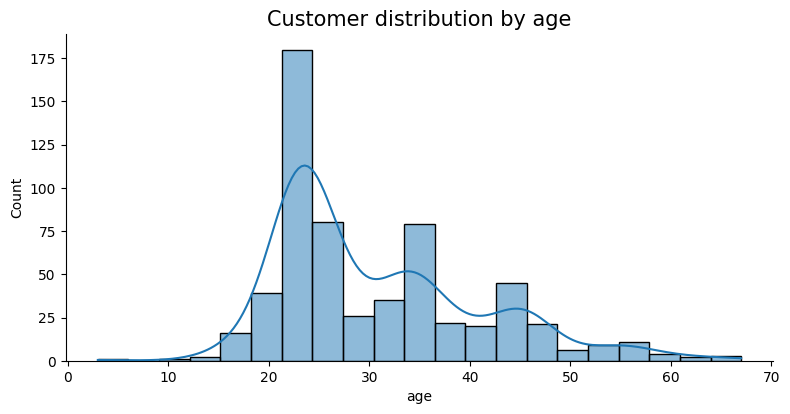

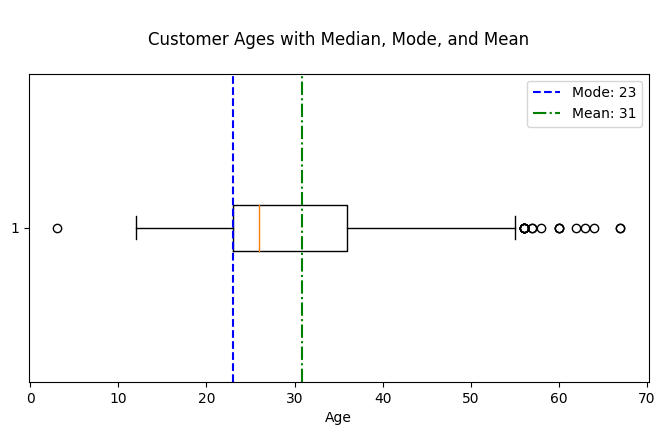

In [ ]:
# Displot
sns.displot(data=data, x='age', kde=True, height=4, aspect=2)
plt.title('Customer distribution by age' , fontsize = 15)
plt.show()

# Box Plot
plt.figure(figsize=(8,4))
age_mode = statistics.mode(data.age)
age_mean = statistics.mean(data.age)
plt.boxplot(data.age, vert=False)
plt.axvline(x=age_mode, color='blue', linestyle='--', label=f'Mode: {age_mode}')
plt.axvline(x=age_mean, color='green', linestyle='-.', label=f'Mean: {round(age_mean)}')
plt.legend()
plt.xlabel('Age')
plt.title('\nCustomer Ages with Median, Mode, and Mean\n')
plt.show()

The distribution has a significant positive skew that peaks around the age of 23. This shows that teens and newcomers are more regular purchases than older shoppers.




In [ ]:
Age = data['Age_Category'].value_counts()
fig1 = px.pie(data_frame=Age, names=Age.index, values=Age.values, labels=Age.index)
fig1.update_layout(
    height=450,
    width=600,
    showlegend=True,
    title="Sales distribution by age category",
    title_font_size=22,title_x = 0.5)
fig1.show()

Younger adults, adults, and mid-aged adults, account for 95 percent of sales revennue.


In [ ]:
Age_Top = data.loc[data['Age_Category'].isin (['Young Adult (18-25)','Adult (26-40)']),['Purchase_Categories','Time_Status']]

In [ ]:
fig = px.histogram(data_frame=  Age_Top['Purchase_Categories'] , title= 'Top 78 % (Adult , Young Adult) Customers Choice by Purchase Categories')
fig.update_layout(height = 950 , width = 1000, title_font_size = 22,autosize=True , xaxis=dict(tickangle=50))
fig.show()

In [ ]:
fig1 = px.pie(data_frame= Age_Top['Time_Status'].value_counts(),
              names=Age_Top['Time_Status'].value_counts().index,
              hover_name= Age_Top['Time_Status'].value_counts().index,
             values=Age_Top['Time_Status'].value_counts().values , title= 'Analyze the time segments spent by Adult and Young Adult customers on Amazon')
fig1.update_layout(height = 450 , width = 1000, title_font_size = 15, showlegend=True, autosize = True  )
fig1.show()

Majority of customers would rather shop late at night.



In [ ]:
fig = px.pie(data_frame= data['Time_Status'].value_counts() ,
             names= data['Time_Status'].value_counts().index,
             values= data['Time_Status'].value_counts().values,
             hover_name= data['Time_Status'].value_counts().index,
             title ='Sales distribution by Time Status')
fig.update_layout(height = 450 , width = 600 , title_font_size = 20 , title_x = 0.5)
fig.show()


The majority of consumers (65.3%) prefer to buy at night, followed by evenings (15.4%), afternoons (15%), and mornings (4.32%).


### Rating and Review Analysis

In [ ]:
print("Average rating =", round(data['Shopping_Satisfaction'].mean() , 2))

Average rating = 2.46


In [ ]:
fig = px.bar(data_frame= data['Shopping_Satisfaction'].value_counts().reset_index() , y = data['Shopping_Satisfaction'].index , x = data['Shopping_Satisfaction'].values , title = 'Shopping rating distribution')
fig.update_traces(marker_color='grey')
fig.update_layout(height = 400 , width =750, plot_bgcolor = 'light blue' , title_x = 0.5)
fig.show()



Customers gave an average rating of 2.46.

The majority of people (34.71%) gave it a 3, while 32.22% rated it a 2.

A lower proportion of people (19.1%) ranked it as one, while 11.12% and 2.8% rated it as four and five, respectively.


In [ ]:
print("Most given Shopping Rating given by female :",data.loc[data["Gender"] == 'Female' , 'Shopping_Satisfaction' ].mode().tolist()[-1])
print("Most given Shopping Rating given by male :",data.loc[data["Gender"] == 'Male' , 'Shopping_Satisfaction' ].mode().tolist()[-1])
print("Most given Shopping Rating given by others :",data.loc[data["Gender"] == 'Others' , 'Shopping_Satisfaction' ].mode().tolist()[:])

Most given Shopping Rating given by female : 3
Most given Shopping Rating given by male : 2
Most given Shopping Rating given by others : [2, 3]


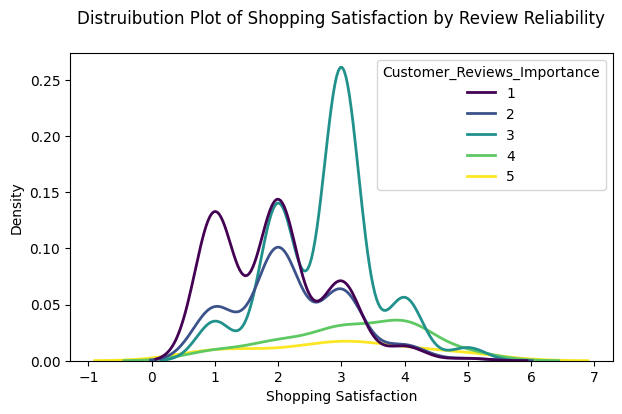

In [ ]:
plt.figure(figsize=(7,4))

sns.kdeplot(data=data, x='Shopping_Satisfaction', hue='Customer_Reviews_Importance', palette="viridis",linewidth=2)

plt.title('Distruibution Plot of Shopping Satisfaction by Review Reliability\n')
plt.xlabel('Shopping Satisfaction')
plt.ylabel('Density')

plt.show()

Customers that report higher levels of purchasing pleasure, often ranging from 4 to 5.

Those that place a lower value on customer feedback (ranked 1 or 2) have lower levels of purchasing satisfaction, frequently ranging between 1 and 2.

In short, user reviews are a wonderful way to evaluate a product.


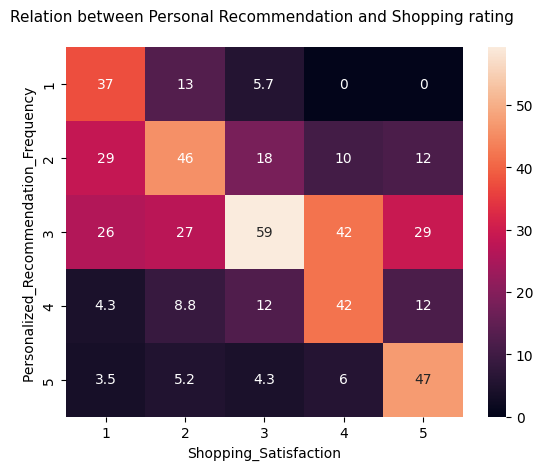

In [ ]:
contingency_table = pd.crosstab(data['Personalized_Recommendation_Frequency '], data['Shopping_Satisfaction'])

contingency_table_percent = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100

sns.heatmap(contingency_table_percent, annot=True)
plt.title('Relation between Personal Recommendation and Shopping rating \n', fontdict=dict(size=11))
plt.show()


**Personalized Recommendations and Shopping Satisfaction**

Our analysis reveals a clear connection between the frequency of personalized recommendations and customer satisfaction. Customers who receive more frequent, relevant suggestions tend to report more positive shopping experiences.

* Nearly half (47%) of users who receive the most frequent, well-tailored recommendations (rated 5) report a highly satisfying shopping experience (rated 5).

* Similarly, a significant portion (42%) of those who receive regular recommendations (rated 4) also report a positive experience (rated 4).

* This trend continues for moderately frequent recommendations (rated 3), with over half (59%) of these users expressing a satisfactory experience (rated 3).

* Interestingly, the frequency seems to play a role in dissatisfaction as well. Almost half (46%) of users who receive infrequent recommendations (rated 2) report an unhappy experience.

* The impact is even more pronounced for irrelevant or unusual recommendations (rated 1), with a significant majority (7%) expressing a very negative experience (rated 1).

This highlights the importance of personalization in enhancing customer satisfaction. By providing relevant suggestions more frequently, businesses can significantly improve the overall shopping experience for their customers.


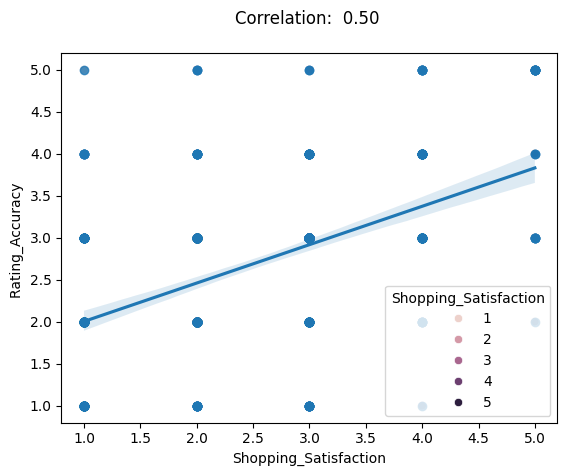

In [ ]:
corr, _ = spearmanr(data['Shopping_Satisfaction'], data['Rating_Accuracy '])
sns.scatterplot(data , x ='Shopping_Satisfaction' , y = 'Rating_Accuracy ' , hue = 'Shopping_Satisfaction' )
sns.regplot(data=data, x='Shopping_Satisfaction', y='Rating_Accuracy ' )
plt.title(f'Correlation:  {corr:.2f} \n')
plt.show()

**Shopping Rating and Satisfaction: A Moderately Positive Connection**

The analysis revealed a moderate positive correlation coefficient of 0.50 between shopping rating and shopping satisfaction. This indicates that when one variable (shopping rating) increases, the other (shopping satisfaction) also tends to increase. However, the correlation is not perfect, suggesting that there are other factors influencing satisfaction besides just the rating. In simpler terms, higher shopping ratings tend to coincide with greater customer satisfaction, but there's room for improvement and other factors at play.

In [ ]:
print('Only', round(len(data.loc[data['Review_Left'] == 'Yes' , : ].index )/ len(data.index) * 100 , 2) , "% users actively participated in the Review.")


Only 51.5 % users actively participated in the Review.


In [ ]:
print('Although',round(len(data.loc[data['Review_Reliability'].isin(['Heavily','Moderately']) , : ].index )/ len(data.index) * 100, 2 ) ,
      "% of users rely on the reviews, only",round(len(data.loc[data['Review_Helpfulness'] == 'Yes' , : ].index )/ len(data.index) * 100 , 2),
     '% found them useful.')

Although 57.81 % of users rely on the reviews, only 39.37 % found them useful.


**The Gap Between Review Trust and Usefulness**

Our analysis reveals a gap between the trust users place in reviews (reliability) and how helpful they actually find them in making purchase decisions. Here are two potential explanations for this disconnect:

* **Varied User Goals:**  People might rely on reviews for various purposes beyond just informing purchase choices. They might seek general product information, compare features with similar items, or understand how the product performs in real-world scenarios. However, these purposes may not always translate into reviews directly aiding their final buying decision.

* **Inconsistent Review Quality:** Reviews can vary significantly in quality, trustworthiness, and relevance to a specific user's needs. While users might initially turn to reviews for guidance, the content itself might not meet their individual expectations or provide the specific details they're looking for.

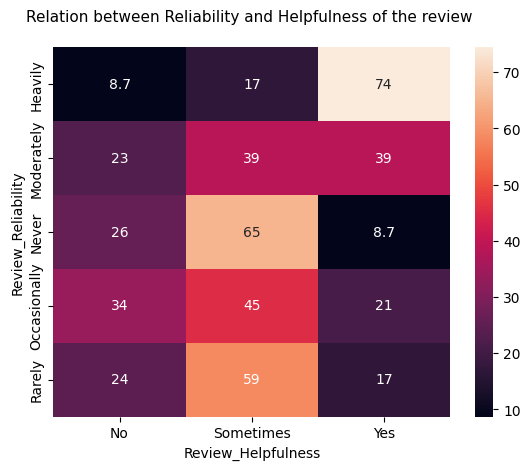

In [ ]:
contingency_table = pd.crosstab(data['Review_Reliability'], data['Review_Helpfulness'])

contingency_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

sns.heatmap(contingency_percent, annot=True)
plt.title('Relation between Reliability and Helpfulness of the review \n', fontdict=dict(size=11))
plt.show()


The heatmap indicates a strong connection between users' trust in reviews and their perceived usefulness. A significant portion (approximately 74%) of those who rely heavily on reviews report finding them valuable in making informed purchase decisions.

In [ ]:
fig = px.pie(data['Service_Appreciation'].value_counts().reset_index(),
             names = data['Service_Appreciation'].value_counts().index,
             values = data['Service_Appreciation'].value_counts().values,
             hover_name = data['Service_Appreciation'].value_counts().index,
             title= 'Service Appreciation Factors' )
fig.update_layout(height = 450 , width = 1000)
fig.show()



**Customers Most Appreciate:**

* **Product Recommendations:** This emerged as the most appreciated factor, garnering 185 votes. This suggests that customers value suggestions that align with their interests and needs.
* **Competitive Prices:** Competitive pricing ranked second with 182 votes, highlighting the importance of price sensitivity for customers.
* **Wide Product Selection:** A diverse product selection came in third with 150 votes, indicating that customers appreciate having a variety of options to choose from.


In [ ]:
fig = px.bar(data_frame = data['Improvement_Areas'].value_counts().reset_index() ,
             x = data['Improvement_Areas'].value_counts().index ,
             y = data['Improvement_Areas'].value_counts().values , \
             title = 'Improvement Areas distribution')
fig.update_layout(height = 600 , width = 900 , plot_bgcolor = 'lightgrey', title_font_size =18 )
fig.show()



**Customer Feedback Reveals Improvement Opportunities:**

Analysis of customer comments identified three key areas requiring improvement:

1. **Customer Service:**  Feedback suggests a need for enhanced customer service experiences.
2. **Product Quality:**  Comments indicate room for improvement in product quality.
3. **Packaging Waste Reduction:** Customers expressed a desire for the company to reduce packaging waste.


###  Behavior Analysis

In [ ]:
fig = px.pie(data_frame= data['Cart_Completion_Frequency'].value_counts().reset_index() ,
             names= data['Cart_Completion_Frequency'].value_counts().index,
             labels= data['Cart_Completion_Frequency'].value_counts().index,
             values= data['Cart_Completion_Frequency'].value_counts().values ,
             title= "Customer's Cart Completion frequency")
fig.update_layout(height = 450 , width = 600)
fig.show()


More than half of the customers (51%) complete their carts most of the time. Additionally, a significant portion (26%) frequently completes their carts.  A smaller percentage of customers rarely (12%) or always (7.81%) complete their carts.

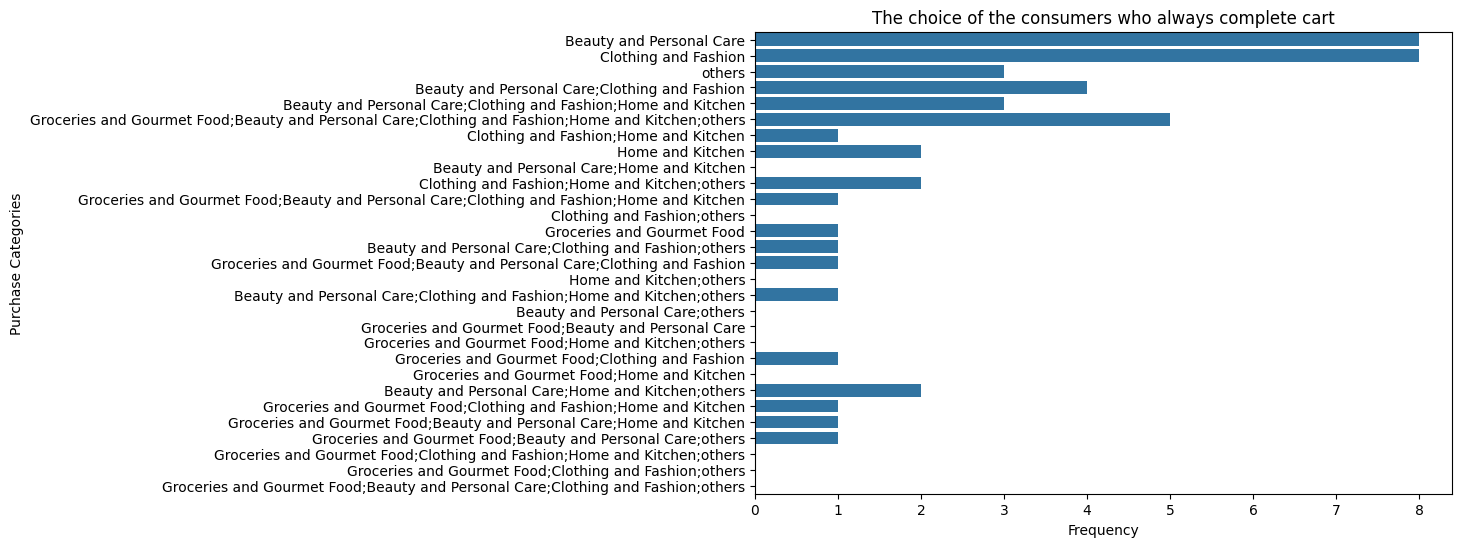

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(y='Purchase_Categories', data=data.loc[data['Cart_Completion_Frequency'] == 'Always',:], order=data['Purchase_Categories'].value_counts().index)
plt.title('The choice of the consumers who always complete cart')
plt.xlabel('Frequency')
plt.ylabel('Purchase Categories')
plt.show()



 **High Repeat Purchase Rate:**  The analysis indicates that 7.81% of customers consistently complete their carts, demonstrating a high repeat purchase behavior.

 **Top Categories for Repeat Purchasers:**  Among these repeat purchasers, the categories "Beauty and Personal Care" and "Clothing and Fashion" show the strongest customer retention. This suggests that customers who always complete their carts are more likely to return for these specific product categories.


In [ ]:
print(round(len(data.loc[data['Recommendation_Helpfulness'].isin([ 'Yes' , 'Sometimes']) , : ].index) / len(data.index) * 100,2),
      "% of user found recommendations helpful," ,
    'only',round(len(data.loc[data['Recomendation_Purchase_Status'].isin([ 'Yes' , 'Sometimes']) , : ].index) / len(data.index) * 100,2),
      '% of amazon shoppers use them.')

71.43 % of user found recommendations helpful, only 58.31 % of amazon shoppers use them.


**Recommendations Might not Always Lead to Sales**

While recommendations play a role in the shopping journey, they don't always guarantee a purchase. Here are some potential explanations:

* **Match Mismatch:**  Sometimes, recommendations might miss the mark and fail to align with a customer's current needs. They might not be relevant to the user's immediate search or browsing interests.
* **The Power of Choice:** Customers appreciate suggestions, but they also value their autonomy. They might prefer to explore different options or make independent purchasing decisions.
* **Beyond Recommendations:** Purchase decisions are influenced by a variety of factors beyond recommendations. Price, product reviews, and personal preferences all play a significant role in the final choice.
* **Inspiration Station:**  Recommendations might not always lead to immediate purchases. Some users might view them as a source of inspiration or information gathering, not necessarily prompting an immediate buying decision.


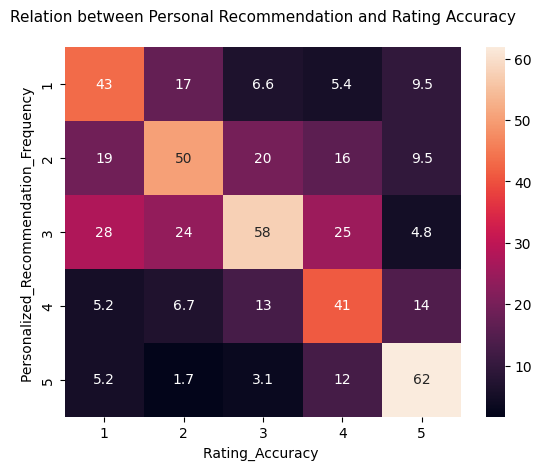

In [ ]:
contingency_table = pd.crosstab(data['Personalized_Recommendation_Frequency '], data['Rating_Accuracy '])

contingency_percent = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100

sns.heatmap(contingency_percent, annot=True)
plt.title('Relation between Personal Recommendation and Rating Accuracy\n', fontdict=dict(size=11))
plt.show()

**Heatmap Reveals Link Between Recommendation Accuracy and Frequency**

Our analysis using a heatmap uncovers a positive correlation between the frequency of recommendations and their perceived accuracy by customers. As the frequency of recommendations increases, so do the ratings for their accuracy. This suggests that recommendations based on more accurate assessments provide customers with a more reliable preview of products. This finding highlights the importance of genuine reviews in generating effective recommendations.


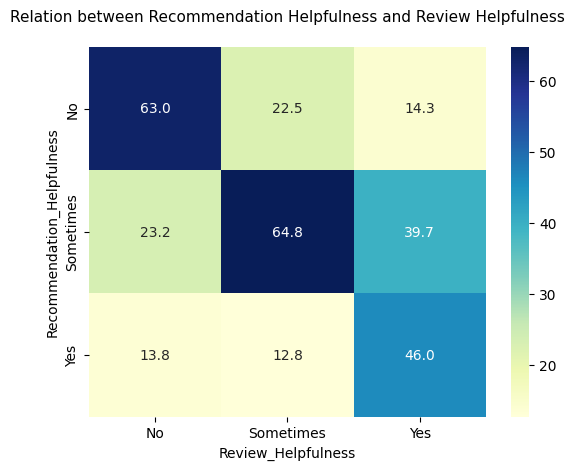

In [ ]:
contingency_table = pd.crosstab(data['Recommendation_Helpfulness'], data['Review_Helpfulness'])

contingency_percent = contingency_table.div(contingency_table.sum(axis = 0) ,axis = 1) * 100

sns.heatmap(contingency_percent, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Relation between Recommendation Helpfulness and Review Helpfulness\n', fontdict=dict(size=11))
plt.show()



**Heatmap Unveils Connection Between Review and Recommendation Usefulness**

The heatmap analysis reveals a clear link between how helpful users find reviews and recommendations. Here's a breakdown of the insights:

* **Reviews Set the Stage:** A significant portion (63%) of those who never found recommendations helpful also reported never encountering useful reviews. This suggests that a positive experience with reviews might be a prerequisite for appreciating recommendations.
* **Occasional Alignment:** There's a group (64.8%) who find both recommendations and reviews helpful, but only sometimes. This indicates that the usefulness of both might be situational for some users.
* **Regular Users, Higher Satisfaction:** Interestingly, a substantial percentage (46%) of those who consistently value recommendations also report higher satisfaction with reviews. This suggests that users who find recommendations helpful tend to have more positive experiences with reviews overall.

In conclusion, the analysis highlights a significant correlation between how users perceive the helpfulness of recommendations and their past experiences with finding reviews useful. This suggests that building a system of high-quality and trustworthy reviews can contribute to the effectiveness of recommendation algorithms.


## **6. Model Development**

### Data Prepocessing

In [ ]:
# load data
df = data.copy()

In [ ]:
df.head()

,Date,Time,Time_Status,age,Age_Category,Gender,Purchase_Categories,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,...,Review_Reliability,Review_Helpfulness,Recomendation_Purchase_Status,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Purchase_Frequency
0,04/06/2023,18:58:19,Evening,23,Young Adult (18-25),Female,Beauty and Personal Care,Few times a week,Keyword,Multiple pages,...,Occasionally,Yes,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,Few times a month
1,04/06/2023,20:00:44,Evening,23,Young Adult (18-25),Female,Clothing and Fashion,Few times a month,Keyword,Multiple pages,...,Heavily,Yes,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,Once a month
2,04/06/2023,22:34:56,Night,24,Young Adult (18-25),Prefer not to say,Groceries and Gourmet Food;Clothing and Fashion,Few times a month,Keyword,Multiple pages,...,Occasionally,No,No,4,No,3,3,Competitive prices,Product quality and accuracy,Few times a month
3,04/06/2023,22:43:00,Night,24,Young Adult (18-25),Female,Beauty and Personal Care;Clothing and Fashion;...,Few times a month,Keyword,First page,...,Heavily,Yes,Sometimes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,Once a month
4,04/06/2023,22:58:06,Night,22,Young Adult (18-25),Female,Beauty and Personal Care;Clothing and Fashion,Few times a month,Filter,Multiple pages,...,Heavily,Yes,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,Less than once a month


In [ ]:
# describe dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,602.0,30.790698,10.193276,3.0,23.0,26.0,36.0,67.0
Customer_Reviews_Importance,602.0,2.480066,1.185226,1.0,1.0,3.0,3.0,5.0
Personalized_Recommendation_Frequency,602.0,2.699336,1.042028,1.0,2.0,3.0,3.0,5.0
Rating_Accuracy,602.0,2.672757,0.899744,1.0,2.0,3.0,3.0,5.0
Shopping_Satisfaction,602.0,2.463455,1.012152,1.0,2.0,2.0,3.0,5.0


In [ ]:
# drop Timestamp from dataset
df.drop(['Date','Time'],inplace=True,axis=1)

In [ ]:
df.dtypes

Time_Status                               object
age                                        int64
Age_Category                              object
Gender                                    object
Purchase_Categories                       object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Recomendation_Purchase_Status             object
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                object
Rating_Accuracy                            int64
Shopping_Satisfactio

In [ ]:
df = df.dropna()

In [ ]:
# class distribution
df.groupby("Gender").size()

Gender
Female               352
Male                 142
Others                19
Prefer not to say     89
dtype: int64

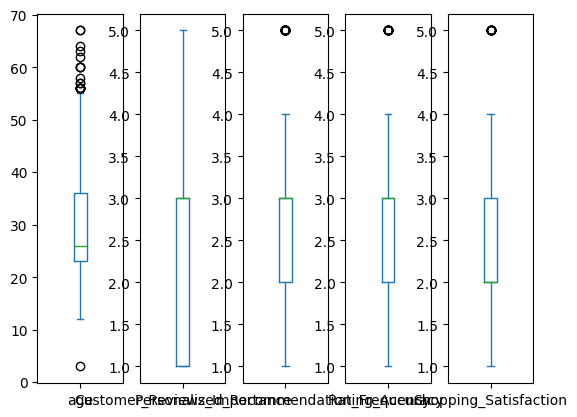

In [ ]:
# box and whisker plots
df.plot(kind="box", subplots=True, sharex=False, sharey=False)
plt.show()

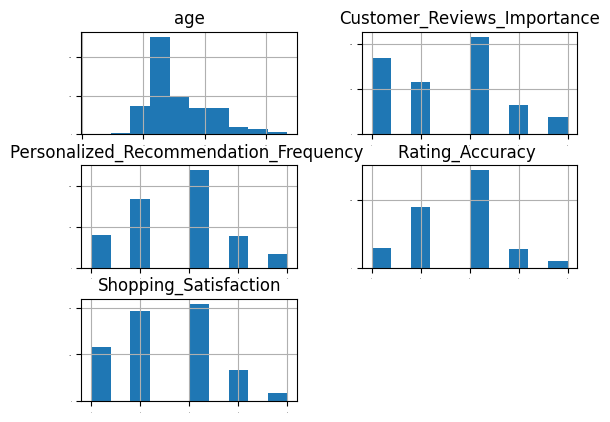

In [ ]:
# histogram
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

In [ ]:
# split input and output variable
x = df.drop(['Gender'], axis=1)
y = df['Gender']

In [ ]:
# convert to string
x = x.astype(str)

### Catagorical Encoding

In [ ]:
# prepare input data
def prepare_inputs(x_train, x_test):
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    oe.fit(x_train)
    x_train_enc = oe.transform(x_train)
    x_test_enc = oe.transform(x_test)
    return x_train_enc, x_test_enc

### Target Encoding

In [ ]:
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

### Feature Scalling

In [ ]:
# feature selection
def select_features(x_train, y_train, x_test):
    fs = SelectKBest(score_func=chi2, k=15)
    fs.fit(x_train, y_train)
    x_train_fs = fs.transform(x_train)
    x_test_fs = fs.transform(x_test)
    return x_train_fs, x_test_fs, fs

In [ ]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((481, 23), (121, 23), (481,), (121,))

In [ ]:
# prepare input data
x_train_enc, x_test_enc = prepare_inputs(x_train, x_test)

In [ ]:
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [ ]:
# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train_enc, y_train_enc, x_test_enc)
x_train_fs.shape, x_test_fs.shape


((481, 15), (121, 15))

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 2.557656
Feature 1: 30.231644
Feature 2: 23.795308
Feature 3: 196.669813
Feature 4: 1.639115
Feature 5: 3.992096
Feature 6: 1.663367
Feature 7: 13.991366
Feature 8: 9.591061
Feature 9: 4.185675
Feature 10: 1.355832
Feature 11: 2.441824
Feature 12: 0.706066
Feature 13: 7.305193
Feature 14: 10.537447
Feature 15: 2.882849
Feature 16: 7.709323
Feature 17: 4.472732
Feature 18: 3.420467
Feature 19: 10.136995
Feature 20: 7.125628
Feature 21: 6.940209
Feature 22: 0.982145


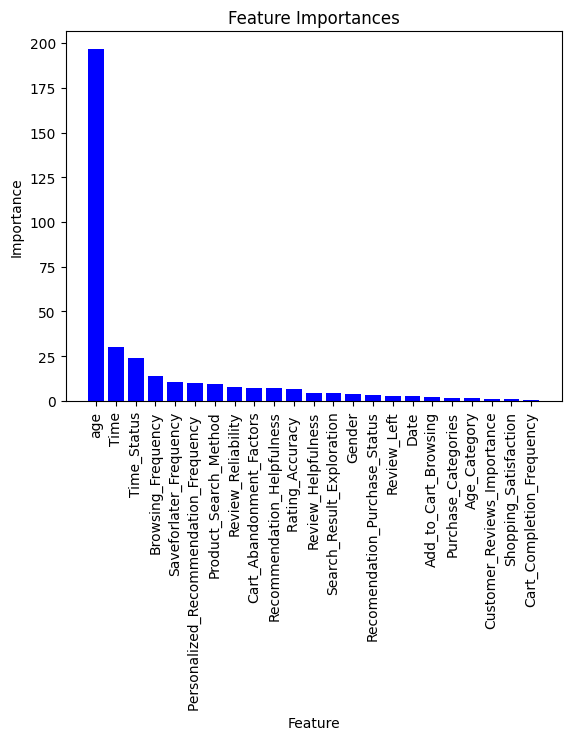

In [ ]:
# Display in a graph the feature importance of the data features
importances = fs.scores_
indices = np.argsort(importances)[::-1]
plt.bar(range(len(indices)), importances[indices], color='blue', align='center')
plt.xticks(range(len(indices)), data.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

### Outliers detection

In [ ]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(x_train_enc)
# select all rows that are not outliers
mask = yhat != -1
x_train_enc, y_train_enc = x_train_enc[mask, :], y_train_enc[mask]
# summarize the shape of the updated training dataset
print(x_train_enc.shape, y_train_enc.shape)

(480, 23) (480,)


## **7. Machine Learning Models**

### **Classification Models**

In [ ]:
# spot check algorithms
models = []
models.append(("LR", LogisticRegression(solver="lbfgs", max_iter=1000)))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
  cv = KFold(n_splits=10, random_state=None)
  scores = cross_val_score(model, x_train_enc, y_train_enc, scoring="accuracy", cv=cv)
  names.append(name)
  results.append(scores)
  print("%s %.2f (%.2f)" % (name, scores.mean(), scores.std()))

LR 0.59 (0.06)
LDA 0.60 (0.04)
KNN 0.58 (0.06)
NB 0.50 (0.05)
SVM 0.61 (0.04)


### **Using Selected features**

In [ ]:
y_train_enc.shape,x_train_fs.shape

((480,), (481, 15))

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
  cv = KFold(n_splits=10, random_state=None)
  scores = cross_val_score(model, x_train_fs, y_train, scoring="accuracy", cv=cv)
  names.append(name)
  results.append(scores)
  print("%s %.2f (%.2f)" % (name, scores.mean(), scores.std()))

LR 0.60 (0.05)
LDA 0.59 (0.04)
KNN 0.57 (0.07)
NB 0.53 (0.06)
SVM 0.61 (0.04)


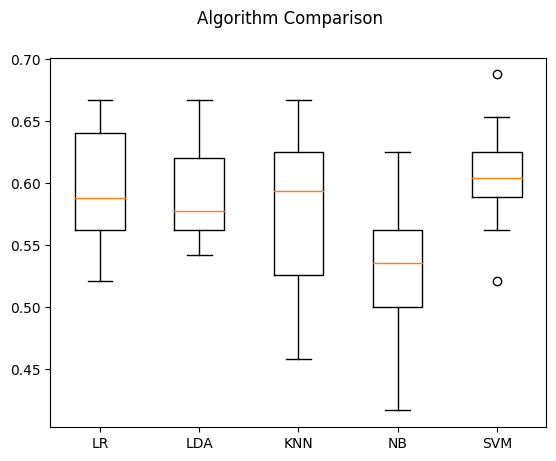

In [ ]:
# compare algorithm
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Hyperparameter Tuning with Grid Search




In [ ]:
# tunned with svm
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)


model = SVC()
cv = KFold(n_splits=10, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=cv)
grid_result = grid.fit(x_train_enc, y_train_enc)
print("Best: %.3f using %r" % (grid_result.best_score_, grid_result.best_params_))


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
  print("%.3f (%.3f) with %r" % (mean, std, param))

Best: 0.608 using {'C': 0.9, 'kernel': 'sigmoid'}
0.606 (0.042) with {'C': 0.1, 'kernel': 'linear'}
0.606 (0.042) with {'C': 0.1, 'kernel': 'poly'}
0.606 (0.042) with {'C': 0.1, 'kernel': 'rbf'}
0.606 (0.042) with {'C': 0.1, 'kernel': 'sigmoid'}
0.604 (0.042) with {'C': 0.3, 'kernel': 'linear'}
0.606 (0.042) with {'C': 0.3, 'kernel': 'poly'}
0.606 (0.042) with {'C': 0.3, 'kernel': 'rbf'}
0.606 (0.042) with {'C': 0.3, 'kernel': 'sigmoid'}
0.604 (0.042) with {'C': 0.5, 'kernel': 'linear'}
0.600 (0.039) with {'C': 0.5, 'kernel': 'poly'}
0.606 (0.042) with {'C': 0.5, 'kernel': 'rbf'}
0.606 (0.041) with {'C': 0.5, 'kernel': 'sigmoid'}
0.604 (0.042) with {'C': 0.7, 'kernel': 'linear'}
0.592 (0.040) with {'C': 0.7, 'kernel': 'poly'}
0.606 (0.042) with {'C': 0.7, 'kernel': 'rbf'}
0.606 (0.039) with {'C': 0.7, 'kernel': 'sigmoid'}
0.604 (0.042) with {'C': 0.9, 'kernel': 'linear'}
0.588 (0.041) with {'C': 0.9, 'kernel': 'poly'}
0.606 (0.042) with {'C': 0.9, 'kernel': 'rbf'}
0.608 (0.049) with {'

### **Using Standard Scaler**

In [ ]:
# standardize with basic algorithms
pipelines = []
pipelines.append(("scalerLR", Pipeline([("scaler", StandardScaler()), ("LR", LogisticRegression(solver="lbfgs", max_iter=1000))])))
pipelines.append(("scalerLDA", Pipeline([("scaler", StandardScaler()), ("LDA", LinearDiscriminantAnalysis())])))
pipelines.append(("scalerKNN", Pipeline([("scaler", StandardScaler()), ("KNN", KNeighborsClassifier())])))
pipelines.append(("scalerNB", Pipeline([("scaler", StandardScaler()), ("NB", GaussianNB())])))
pipelines.append(("scalerSVM", Pipeline([("scaler", StandardScaler()), ("SVM", SVC())])))

In [ ]:
# evaluate algorithm with standardize
names = []
results = []
for name, model in pipelines:
  cv = KFold(n_splits=10, random_state=None)
  scores = cross_val_score(model, x_train_enc, y_train_enc, scoring="accuracy", cv=cv)
  names.append(name)
  results.append(scores)
  print("%s %.3f (%.3f)" % (name, scores.mean(), scores.std()))

scalerLR 0.590 (0.055)
scalerLDA 0.602 (0.042)
scalerKNN 0.588 (0.048)
scalerNB 0.496 (0.045)
scalerSVM 0.608 (0.044)


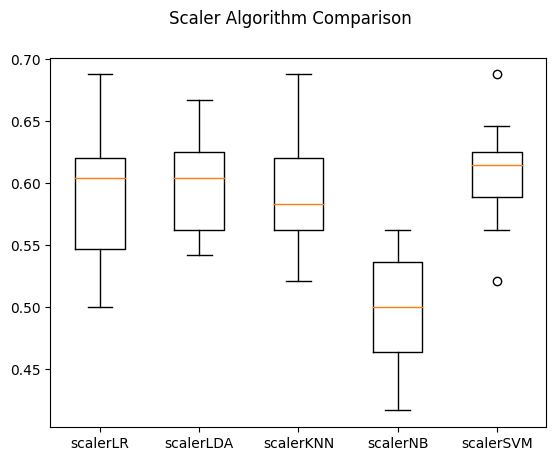

In [ ]:
# compare algorithm
fig = plt.figure()
fig.suptitle("Scaler Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Hyperparameter Tuning with Grid Search




In [ ]:
# tuned with svm standardize
scaler = StandardScaler()
rescaled_x = scaler.fit_transform(x_train_enc)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)


model = SVC()
cv = KFold(n_splits=10, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=cv)
grid_result = grid.fit(rescaled_x, y_train_enc)
print("Best: %.3f using %r" % (grid_result.best_score_, grid_result.best_params_))


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
  print("%.3f (%.3f) with %r" % (mean, std, param))

Best: 0.613 using {'C': 0.7, 'kernel': 'poly'}
0.606 (0.042) with {'C': 0.1, 'kernel': 'linear'}
0.606 (0.042) with {'C': 0.1, 'kernel': 'poly'}
0.606 (0.042) with {'C': 0.1, 'kernel': 'rbf'}
0.606 (0.042) with {'C': 0.1, 'kernel': 'sigmoid'}
0.604 (0.042) with {'C': 0.3, 'kernel': 'linear'}
0.606 (0.042) with {'C': 0.3, 'kernel': 'poly'}
0.606 (0.042) with {'C': 0.3, 'kernel': 'rbf'}
0.606 (0.042) with {'C': 0.3, 'kernel': 'sigmoid'}
0.604 (0.042) with {'C': 0.5, 'kernel': 'linear'}
0.608 (0.040) with {'C': 0.5, 'kernel': 'poly'}
0.606 (0.042) with {'C': 0.5, 'kernel': 'rbf'}
0.606 (0.042) with {'C': 0.5, 'kernel': 'sigmoid'}
0.604 (0.042) with {'C': 0.7, 'kernel': 'linear'}
0.613 (0.042) with {'C': 0.7, 'kernel': 'poly'}
0.606 (0.042) with {'C': 0.7, 'kernel': 'rbf'}
0.606 (0.042) with {'C': 0.7, 'kernel': 'sigmoid'}
0.604 (0.042) with {'C': 0.9, 'kernel': 'linear'}
0.608 (0.046) with {'C': 0.9, 'kernel': 'poly'}
0.606 (0.040) with {'C': 0.9, 'kernel': 'rbf'}
0.606 (0.042) with {'C':

The performance of the model stayed the same even after tuning the parameters on both the selected features and standardized data.

### **Final Baseline Model**

In [ ]:
# preparing the model using tuned parameters
baseline_model = SVC(C= 0.7, kernel = 'poly')
baseline_model.fit(x_train_enc, y_train_enc)

SVC(C=0.7, kernel='poly')

In [ ]:
# estimate accuracy on validation dataset
predictions = baseline_model.predict(x_test_enc)
svc_accuracy = accuracy_score(y_test_enc, predictions)
print(svc_accuracy)
print(confusion_matrix(y_test_enc, predictions))
print(classification_report(y_test_enc, predictions))

0.49586776859504134
[[60  0  0  0]
 [35  0  0  0]
 [ 4  0  0  0]
 [22  0  0  0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.66        60
           1       0.00      0.00      0.00        35
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        22

    accuracy                           0.50       121
   macro avg       0.12      0.25      0.17       121
weighted avg       0.25      0.50      0.33       121



### **Ensemble Models**

In [ ]:
# ensemble methods
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
ensembles.append(("DT", DecisionTreeClassifier()))

In [ ]:
# evaluate each model with ensemble
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=10, random_state=None)
  cv_results = cross_val_score(model, x_train_enc, y_train_enc, cv=kfold, scoring="accuracy")
  results.append(cv_results)
  names.append(name)
  print("%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()))

AB: 0.512 (0.114)
GBM: 0.567 (0.053)
RF: 0.608 (0.055)
ET: 0.575 (0.056)
DT: 0.471 (0.050)


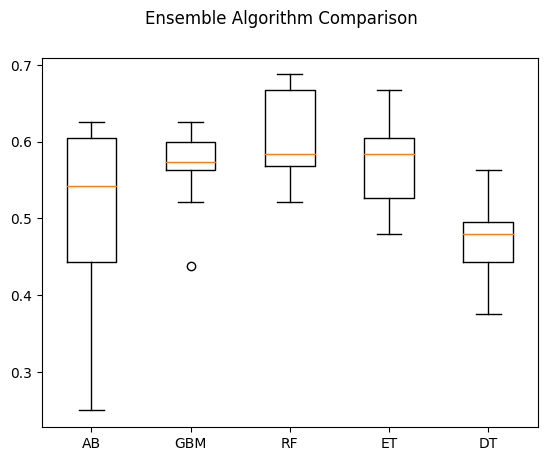

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Hyperparameter Tuning with Grid Search



In [ ]:
# tuned with RF
estimator = [10, 20, 50, 100, 200, 500, 1000]
criterion= ['gini', 'entropy']
param_grid = dict(n_estimators=estimator, criterion=criterion)

model = RandomForestClassifier()
cv = KFold(n_splits=10, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=cv)
grid_result = grid.fit(x_train_enc, y_train_enc)
print("Best: %.3f using %r" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
  print("%.3f (%.3f) with %r" % (mean, std, param))

Best: 0.621 using {'criterion': 'entropy', 'n_estimators': 500}
0.562 (0.044) with {'criterion': 'gini', 'n_estimators': 10}
0.606 (0.050) with {'criterion': 'gini', 'n_estimators': 20}
0.594 (0.040) with {'criterion': 'gini', 'n_estimators': 50}
0.619 (0.060) with {'criterion': 'gini', 'n_estimators': 100}
0.602 (0.048) with {'criterion': 'gini', 'n_estimators': 200}
0.610 (0.050) with {'criterion': 'gini', 'n_estimators': 500}
0.602 (0.052) with {'criterion': 'gini', 'n_estimators': 1000}
0.598 (0.037) with {'criterion': 'entropy', 'n_estimators': 10}
0.600 (0.057) with {'criterion': 'entropy', 'n_estimators': 20}
0.596 (0.050) with {'criterion': 'entropy', 'n_estimators': 50}
0.612 (0.051) with {'criterion': 'entropy', 'n_estimators': 100}
0.619 (0.051) with {'criterion': 'entropy', 'n_estimators': 200}
0.621 (0.051) with {'criterion': 'entropy', 'n_estimators': 500}
0.617 (0.047) with {'criterion': 'entropy', 'n_estimators': 1000}


### **Using Standard Scaler**

In [ ]:
# ensembles with standardize
ensembles = []
ensembles.append(("scalerRF", Pipeline([("scaler", StandardScaler()), ("RF", RandomForestClassifier())])))
ensembles.append(("scalerGBM", Pipeline([("scaler", StandardScaler()), ("GBM", GradientBoostingClassifier())])))
ensembles.append(("scalerET", Pipeline([("scaler", StandardScaler()), ("ET", ExtraTreesClassifier())])))
ensembles.append(("scalerCART", Pipeline([("scaler", StandardScaler()), ("CART", DecisionTreeClassifier())])))
ensembles.append(("scalerAB", Pipeline([("scaler", StandardScaler()), ("AB", AdaBoostClassifier())])))

In [ ]:
# evaluate each model with ensemble
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=10, random_state=None)
  cv_results = cross_val_score(model, x_train_enc, y_train_enc, cv=kfold, scoring="accuracy")
  results.append(cv_results)
  names.append(name)
  print("%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()))

scalerRF: 0.600 (0.055)
scalerGBM: 0.567 (0.051)
scalerET: 0.602 (0.053)
scalerCART: 0.465 (0.075)
scalerAB: 0.512 (0.114)


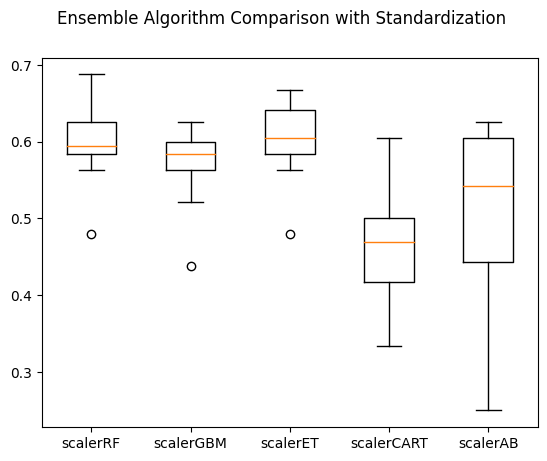

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison with Standardization')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Hyperparameter Tuning with Grid Search




In [ ]:
# tuned with RF
scaler = StandardScaler()
rescaled_x = scaler.fit_transform(x_train_enc)
estimator = [10, 20, 50, 100, 200, 500, 1000]
criterion= ['gini', 'entropy']
param_grid = dict(n_estimators=estimator, criterion=criterion)


model = RandomForestClassifier(random_state=2)
cv = KFold(n_splits=10, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=cv)
grid_result = grid.fit(rescaled_x, y_train_enc)
print("Best: %.3f using %r" % (grid_result.best_score_, grid_result.best_params_))


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
  print("%.3f (%.3f) with %r" % (mean, std, param))

Best: 0.615 using {'criterion': 'entropy', 'n_estimators': 200}
0.571 (0.073) with {'criterion': 'gini', 'n_estimators': 10}
0.598 (0.060) with {'criterion': 'gini', 'n_estimators': 20}
0.602 (0.044) with {'criterion': 'gini', 'n_estimators': 50}
0.608 (0.050) with {'criterion': 'gini', 'n_estimators': 100}
0.604 (0.053) with {'criterion': 'gini', 'n_estimators': 200}
0.613 (0.049) with {'criterion': 'gini', 'n_estimators': 500}
0.613 (0.049) with {'criterion': 'gini', 'n_estimators': 1000}
0.585 (0.054) with {'criterion': 'entropy', 'n_estimators': 10}
0.602 (0.045) with {'criterion': 'entropy', 'n_estimators': 20}
0.604 (0.054) with {'criterion': 'entropy', 'n_estimators': 50}
0.615 (0.049) with {'criterion': 'entropy', 'n_estimators': 100}
0.615 (0.046) with {'criterion': 'entropy', 'n_estimators': 200}
0.613 (0.050) with {'criterion': 'entropy', 'n_estimators': 500}
0.610 (0.053) with {'criterion': 'entropy', 'n_estimators': 1000}


### **Final Ensemble Model**

In [ ]:
# preparing the model using tuned parameters
ensemble_model = RandomForestClassifier(n_estimators=1000, criterion = "gini")
ensemble_model.fit(x_train_enc, y_train_enc)

RandomForestClassifier(n_estimators=1000)

In [ ]:
# estimate accuracy on validation dataset
predictions = ensemble_model.predict(x_test_enc)
rf_accuracy = accuracy_score(y_test_enc, predictions)
print(rf_accuracy)
print(confusion_matrix(y_test_enc, predictions))
print(classification_report(y_test_enc, predictions))

0.4793388429752066
[[54  5  0  1]
 [30  4  0  1]
 [ 4  0  0  0]
 [21  1  0  0]]
              precision    recall  f1-score   support

           0       0.50      0.90      0.64        60
           1       0.40      0.11      0.18        35
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        22

    accuracy                           0.48       121
   macro avg       0.22      0.25      0.20       121
weighted avg       0.36      0.48      0.37       121



## **8. Neural Networks**

### Using Deep Learning

In [ ]:
import tensorflow as tf, keras

In [ ]:
num_classes = len(df["Gender"].unique())

In [ ]:
y_train = pd.get_dummies(y_train_enc)
y_test = pd.get_dummies(y_test_enc)

In [ ]:
# Create the neural network model
model_neural = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(rescaled_x.shape[1],)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# Compile the model
model_neural.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model_neural.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3072      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 13540 (52.89 KB)
Trainable params: 13540 (52.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
model_neural.fit(
    rescaled_x,
    y_train,
    epochs=100,
    batch_size=32
)


Epoch 1/100
15/15 [==============================] - 1s 3ms/step - loss: 0.5989 - accuracy: 0.5792
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.4533 - accuracy: 0.6062
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.4186 - accuracy: 0.6062
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.4003 - accuracy: 0.6083
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3899 - accuracy: 0.6125
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3742 - accuracy: 0.6271
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3642 - accuracy: 0.6354
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3523 - accuracy: 0.6604
Epoch 9/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3402 - accuracy: 0.6708
Epoch 10/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.6812
Epoch 11/

In [ ]:
Y_pred = model_neural.predict(x_test_enc)
Y_pred = np.round(Y_pred)
Y_pred = np.argmax(Y_pred, axis=1)
Y_test_bis = np.argmax(y_test.copy(), axis=1)
confMatrix = confusion_matrix(Y_test_bis, Y_pred)
print(confMatrix)

4/4 [==============================] - 0s 2ms/step
[[38  7  0 15]
 [24  6  0  5]
 [ 4  0  0  0]
 [12  2  0  8]]


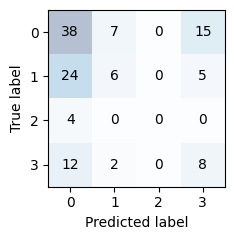

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confMatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confMatrix.shape[0]):
    for j in range(confMatrix.shape[1]):
        ax.text(x=j, y=i, s=confMatrix[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

The model predicted label 0 correctly more than every other label present guessing label 1 and 3 correctly 6 and 8 times respectively, it completely mislabeled label 2.

In [ ]:
loss_test, accuracy_test = model_neural.evaluate(x_test_enc, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 8.5105 - accuracy: 0.4298


### Using Multilayer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics

def print_results(scores):
    print("Accuracy:          %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))
    print("Training time (s): %0.2f (+/- %0.2f)" % (scores['fit_time'].mean(), scores['fit_time'].std() * 2))
    print("Testing time (s):  %0.2f (+/- %0.2f)" % (scores['score_time'].mean(), scores['score_time'].std() * 2))

In [ ]:
# Please note, cell takes approx. 15mins on GPU to test hyperparameters successfully

max_iter_values = [5000]
hidden_layer_size_values = [1000]
solver_values= ['lbfgs', 'sgd', 'adam']
activation_values= ['identity', 'logistic', 'relu']


param_grid = dict(hidden_layer_sizes = hidden_layer_size_values,  max_iter=max_iter_values, solver=solver_values, activation=activation_values)


model = MLPClassifier(random_state=42)
cv = KFold(n_splits=10, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=cv)
grid_result = grid.fit(rescaled_x, y_train)
print("Best: %.3f using %r" % (grid_result.best_score_, grid_result.best_params_))


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
  print("%.3f (%.3f) with %r" % (mean, std, param))

Best: 0.604 using {'activation': 'logistic', 'hidden_layer_sizes': 1000, 'max_iter': 5000, 'solver': 'sgd'}
0.502 (0.053) with {'activation': 'identity', 'hidden_layer_sizes': 1000, 'max_iter': 5000, 'solver': 'lbfgs'}
0.496 (0.045) with {'activation': 'identity', 'hidden_layer_sizes': 1000, 'max_iter': 5000, 'solver': 'sgd'}
0.498 (0.049) with {'activation': 'identity', 'hidden_layer_sizes': 1000, 'max_iter': 5000, 'solver': 'adam'}
0.431 (0.062) with {'activation': 'logistic', 'hidden_layer_sizes': 1000, 'max_iter': 5000, 'solver': 'lbfgs'}
0.604 (0.042) with {'activation': 'logistic', 'hidden_layer_sizes': 1000, 'max_iter': 5000, 'solver': 'sgd'}
0.496 (0.069) with {'activation': 'logistic', 'hidden_layer_sizes': 1000, 'max_iter': 5000, 'solver': 'adam'}
0.400 (0.031) with {'activation': 'relu', 'hidden_layer_sizes': 1000, 'max_iter': 5000, 'solver': 'lbfgs'}
0.444 (0.052) with {'activation': 'relu', 'hidden_layer_sizes': 1000, 'max_iter': 5000, 'solver': 'sgd'}
0.431 (0.037) with {

In [ ]:
# Instantiating MLP
model = MLPClassifier(hidden_layer_sizes=(1000), max_iter=5000, solver='sgd', activation='logistic')

# Validating MLP model
scores = cross_validate(model, x_train_enc, y_train_enc, cv=5)

# Printing performance results
print_results(scores)

Accuracy:          0.59 (+/- 0.05)
Training time (s): 9.73 (+/- 6.37)
Testing time (s):  0.00 (+/- 0.00)


## **9. Benchmarking Performance**

In [ ]:
neural_network_performance = accuracy_test
mlp_performance = scores['test_score'][0]

# Comparing SVC performance and Neural Network
accuracy_df = pd.DataFrame({'Accuracy score ':[neural_network_performance, mlp_performance, rf_accuracy, svc_accuracy]}, index=["NN", 'MLP', "RF", "SVM"])
accuracy_df

,Accuracy score
NN,0.429752
MLP,0.583333
RF,0.479339
SVM,0.495868


In [ ]:
fig = px.bar(data_frame = accuracy_df ,
             x = accuracy_df.index ,
             y = accuracy_df['Accuracy score '].values , \
             title = 'Model Performance Comparison')
fig.update_layout(height = 600 , width = 900 , plot_bgcolor = 'lightgrey', title_font_size =18 )
fig.show()

## **10. Explainable AI**

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
explainer_model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2)
explainer_model.fit(x_train_enc, y_train_enc)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [ ]:
print(f"Accuracy score: {explainer_model.score(x_test_enc, y_test_enc)}")

Accuracy score: 0.49586776859504134


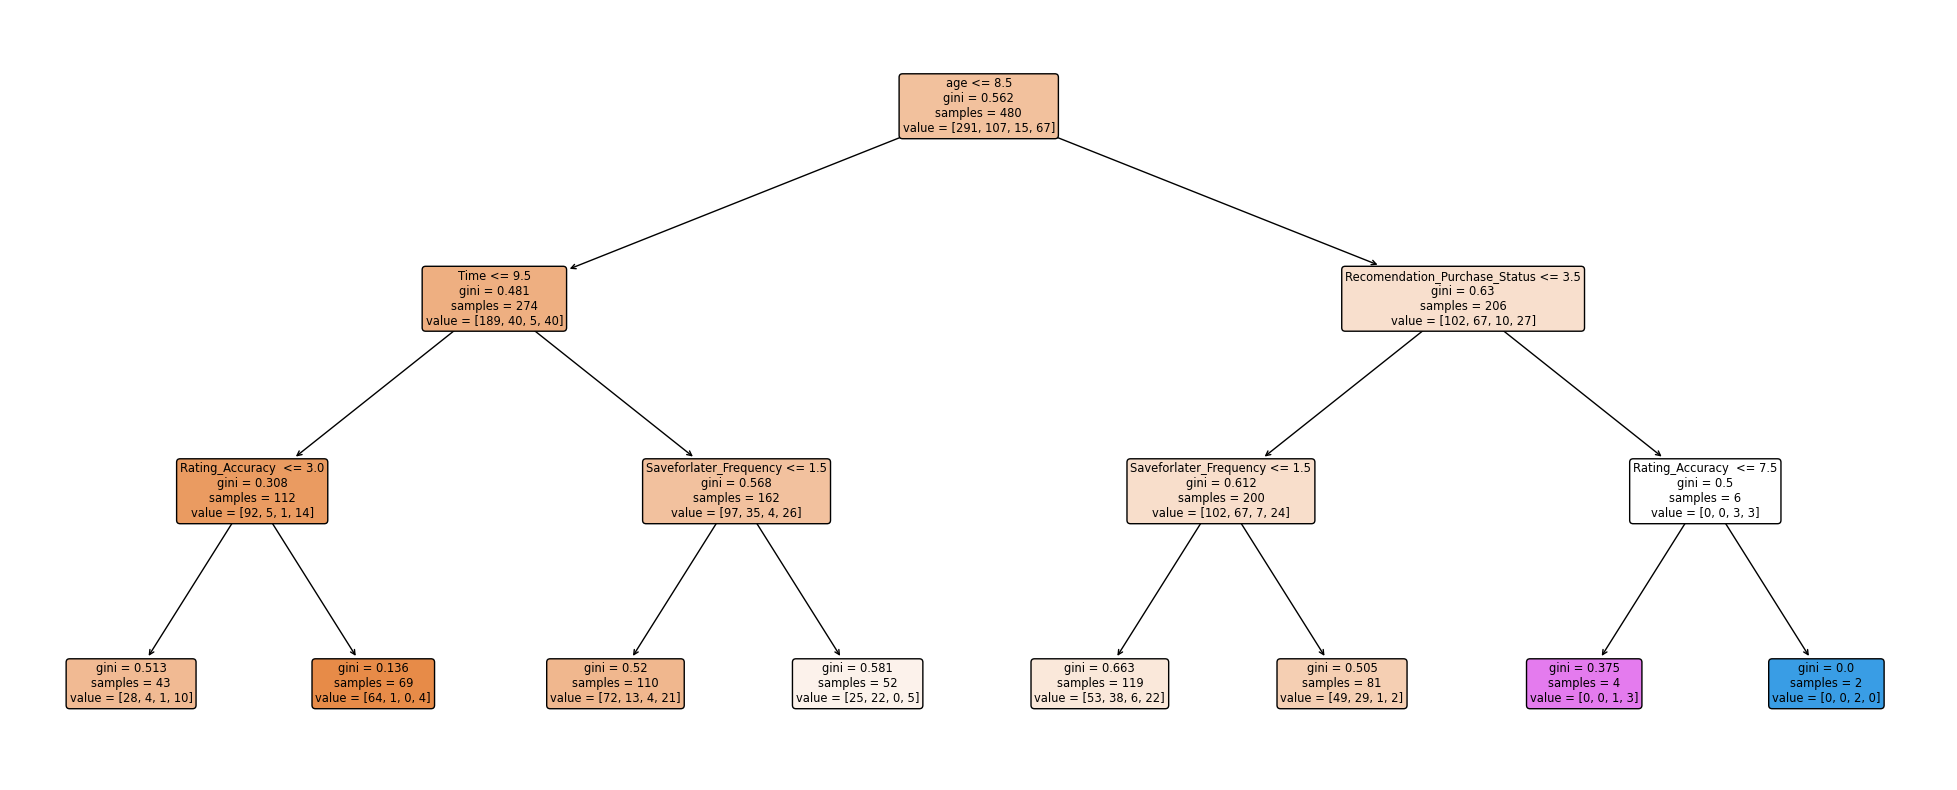

In [ ]:
plt.figure(figsize=(25, 10))
plot_tree(
    explainer_model,
    filled=True,
    feature_names=data.columns.to_list(),
    rounded=True
    )
plt.minorticks_off()